# Bayesian parameter estimation for psychometric function

Demo code to estimate the parameters of a psychometric function, using grid approximation. See this tweet https://twitter.com/inferencelab/status/1272835921717743622?s=20

In [1]:
%load_ext lab_black

In [2]:
import numpy as np
from scipy.stats import norm, bernoulli, halfcauchy, beta, uniform

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 14})

## Grid approximation

In [3]:
μ_list = np.linspace(0, 10, 200)
σ_list = np.linspace(0.01, 1, 180)

In [4]:
def grid_approximation(data, μ_list, σ_list):
    posterior = np.zeros((len(σ_list), len(μ_list)))
    for col, μ in enumerate(μ_list):
        for row, σ in enumerate(σ_list):
            posterior[row, col] = calc_posterior(data, (μ, σ))

    return posterior

In [5]:
def calc_posterior(data, parameters):
    """Return posterior for a given stimulus level (x) and parameters (μ, σ)"""
    x, r = data
    μ, σ = parameters
    # prior
    log_prior = μ_prior.logpdf(μ) + σ_prior.logpdf(σ)
    # likelihood
    response_probability = psychometric_func(x, μ, σ)
    log_likelihood = bernoulli.logpmf(r, response_probability)
    # sum over trials
    log_posterior = np.sum(log_likelihood + log_prior)
    return np.exp(log_posterior)

## Define psychometric function and priors over parameters

In [6]:
def psychometric_func(x, μ, σ, ϵ=0.01):
    """Return response probability for Cumulative Normal psychometric function"""
    return ϵ + (1 - 2 * ϵ) * norm.cdf(x, μ, σ)

In [7]:
μ_prior = uniform(0, 10)
σ_prior = halfcauchy(0, 1)

## Plotting functions

In [8]:
def plot_data(data, ax):
    x, r = data
    trial = np.arange(0, len(x), 1)
    ax.scatter(trial, x, c=r, cmap="binary", edgecolors="k")
    ax.set(xlabel="trial", ylabel="x")

In [9]:
def plot_posterior(posterior, ax):
    """Plot the posterior, not log posterior"""
    ax.pcolor(μ_list, σ_list, posterior, cmap="binary")
    ax.set(xlabel=r"$\mu$", ylabel=r"$\sigma$", title=r"$P(\mu, \sigma | data)$")


def plot_marginal_mu(posterior, ax):
    ax.plot(μ_list, np.sum(posterior, axis=0) / np.sum(np.sum(posterior, axis=0)))
    ax.set(xlabel=r"$\mu$", ylabel=r"$P(\mu|data)$", title="marginal posterior")


def plot_marginal_sd(posterior, ax):
    ax.plot(σ_list, np.sum(posterior, axis=1) / np.sum(np.sum(posterior, axis=1)))
    ax.set(xlabel=r"$\sigma$", ylabel=r"$P(\sigma|data)$", title="marginal posterior")

In [10]:
def plot_example(data):
    fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(6, 12))

    plot_data(data, ax[0])

    posterior = grid_approximation(data, μ_list, σ_list)
    
    plot_posterior(posterior, ax[1])
    plot_marginal_mu(posterior, ax[2])
    plot_marginal_sd(posterior, ax[3])

    fig.tight_layout()
    return fig, ax

# Example 1

(<Figure size 432x864 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9206a2150>,
       dtype=object))

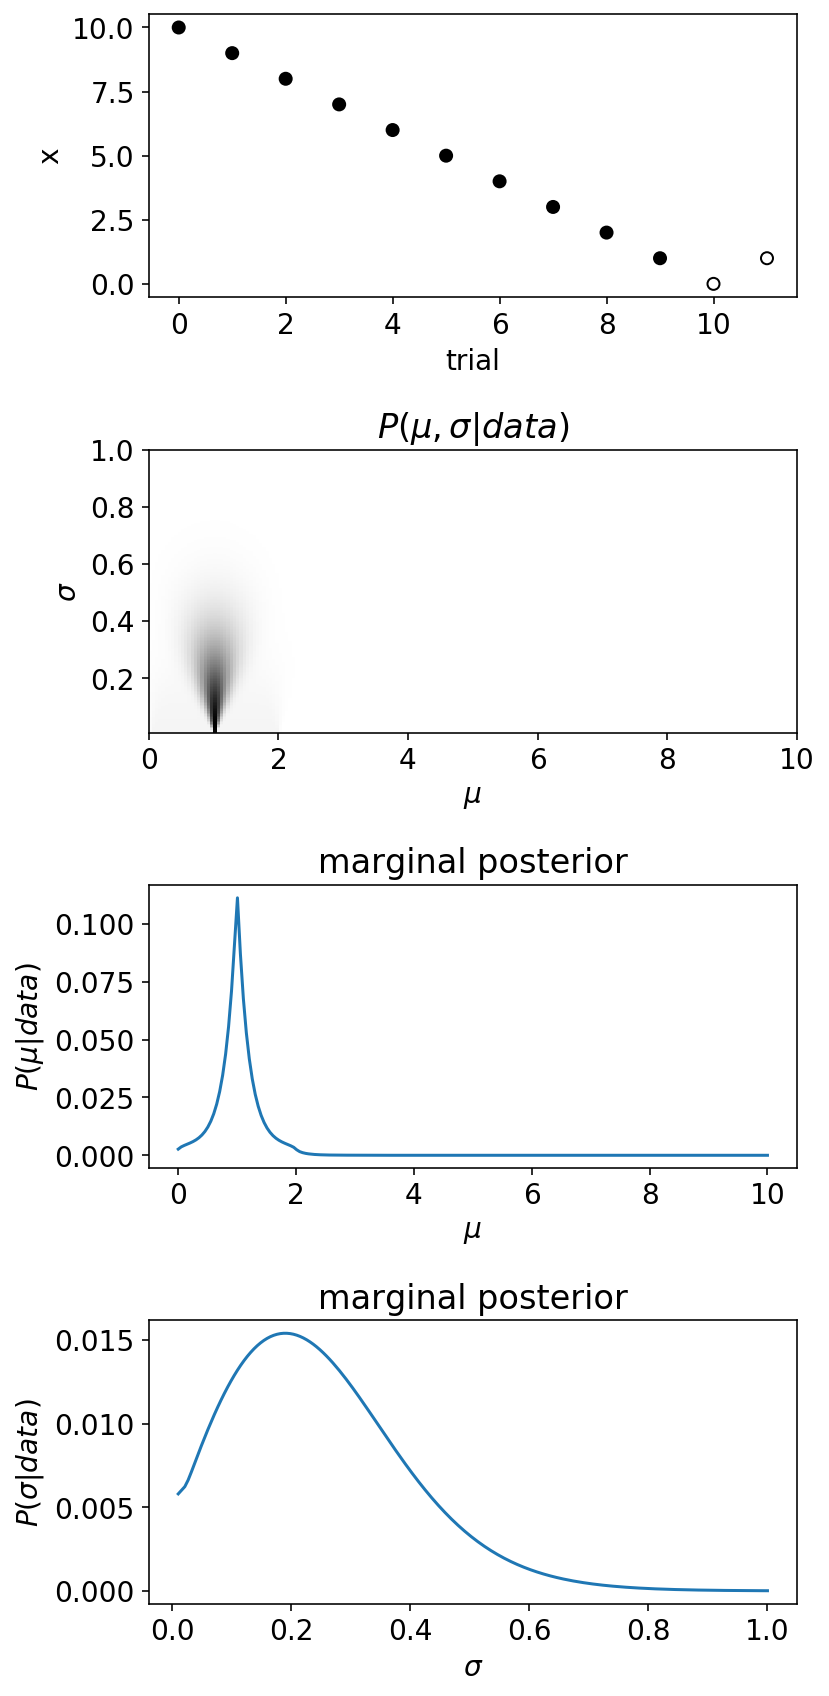

In [11]:
x = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1])
r = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
data = x, r

plot_example(data)

# Example 2

(<Figure size 432x864 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d04f8a10>,
       dtype=object))

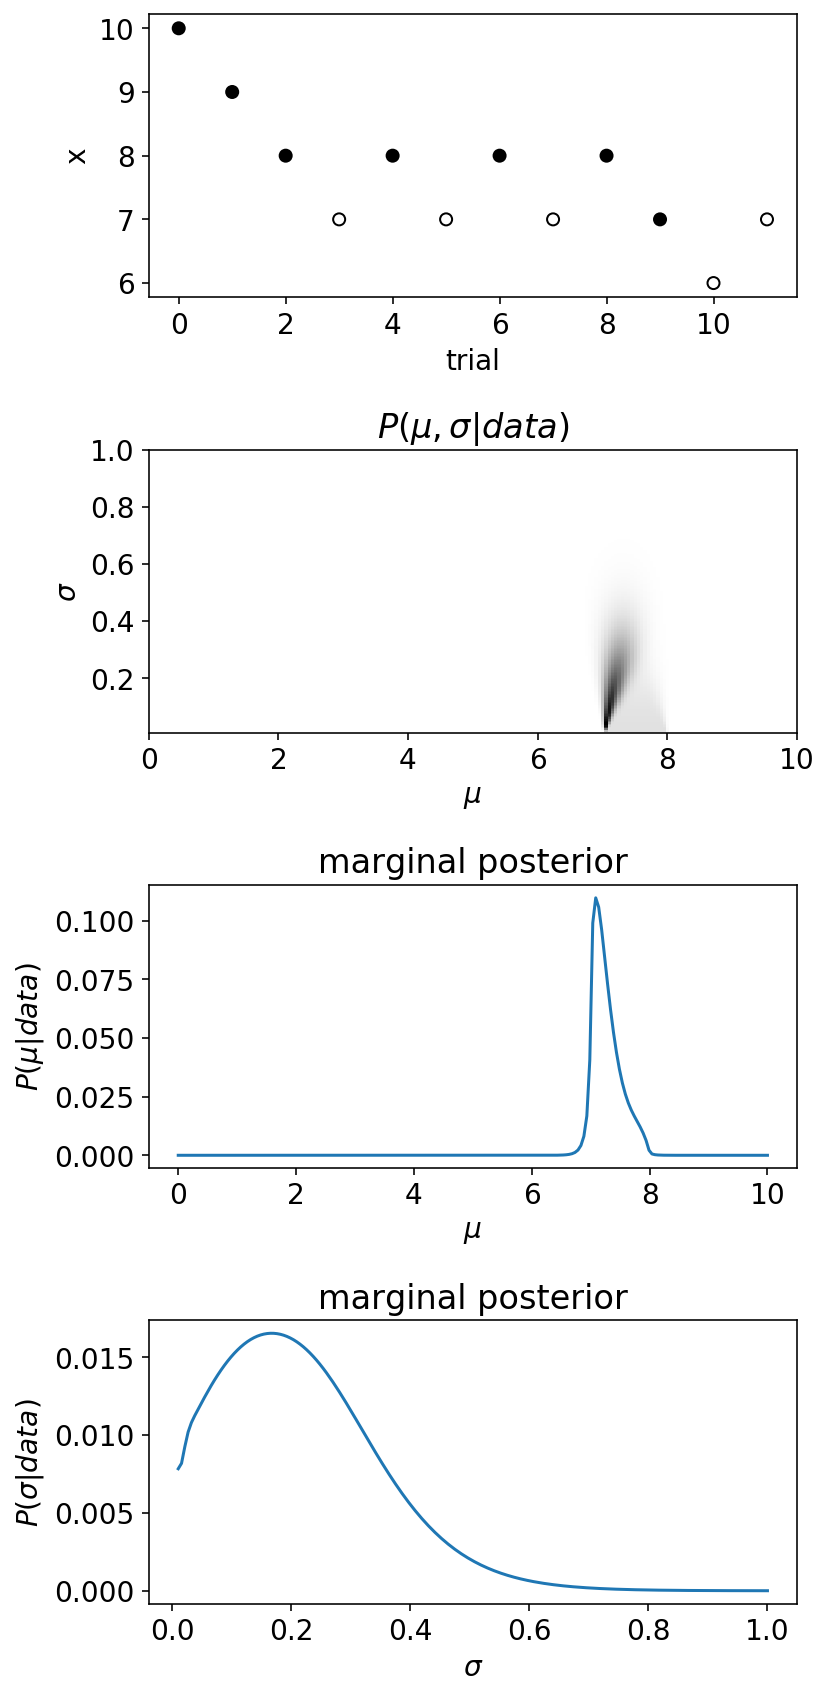

In [12]:
x = np.array([10, 9, 8, 7, 8, 7, 8, 7, 8, 7, 6, 7])
r = np.array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])
data = x, r

plot_example(data)